In [2]:
from glob import glob

import warnings
warnings.filterwarnings('ignore') # :clown:

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [14]:
files = glob('../data/ecg_preprocessed/*.csv')[0]

In [18]:
df = pd.read_csv(files)

In [19]:
df

,timestamp,signal,signal_normalised,subject_id,category,code,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,...,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,2017-12-15 10:16:06+00:00,-7.293812e-05,0.493088,30100,NaN,NaN,-7.293812e-05,-0.000095,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,2017-12-15 10:16:06.001000+00:00,-8.270390e-05,0.492200,30100,NaN,NaN,-8.270390e-05,-0.000097,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,2017-12-15 10:16:06.002000+00:00,-9.491112e-05,0.491090,30100,NaN,NaN,-9.491112e-05,-0.000100,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,2017-12-15 10:16:06.003000+00:00,-1.028458e-04,0.490368,30100,NaN,NaN,-1.028458e-04,-0.000102,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,2017-12-15 10:16:06.004000+00:00,-1.095598e-04,0.489757,30100,NaN,NaN,-1.095598e-04,-0.000105,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691995,2017-12-15 12:40:57.995000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000010,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
8691996,2017-12-15 12:40:57.996000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000010,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
8691997,2017-12-15 12:40:57.997000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000009,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
8691998,2017-12-15 12:40:57.998000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000009,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0


## Task 1: R-R Intervals

In [36]:
import neurokit2 as nk

In [38]:
r_peaks = nk.ecg_findpeaks(df['ECG_Clean'], 1000)

In [39]:
r_peaks

{'ECG_R_Peaks': array([    788,    1941,    3030, ..., 8683962, 8684456, 8691838])}

In [43]:
r_peaks['ECG_R_Peaks']

array([    788,    1941,    3030, ..., 8683962, 8684456, 8691838])

In [51]:
df.iloc[r_peaks['ECG_R_Peaks'][0]]

timestamp                           2017-12-15 10:16:06.788000+00:00
signal                                                      0.001295
signal_normalised                                           0.617498
subject_id                                                     30100
category                                                         NaN
code                                                             NaN
ECG_Raw                                                     0.001295
ECG_Clean                                                   0.000932
ECG_Rate                                                   64.763176
ECG_Quality                                                 0.998214
ECG_R_Peaks                                                        1
ECG_P_Peaks                                                        0
ECG_P_Onsets                                                       0
ECG_P_Offsets                                                      0
ECG_Q_Peaks                       

In [21]:
df['ECG_Rate']

0          64.763176
1          64.763176
2          64.763176
3          64.763176
4          64.763176
             ...    
8691995     8.127879
8691996     8.127879
8691997     8.127879
8691998     8.127879
8691999     8.127879
Name: ECG_Rate, Length: 8692000, dtype: float64

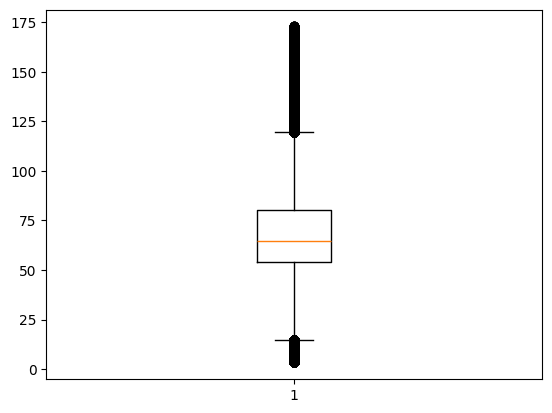

In [145]:
plt.boxplot(df['ECG_Rate'])
plt.show()

In [30]:
df.columns

Index(['timestamp', 'signal', 'signal_normalised', 'subject_id', 'category',
       'code', 'ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality',
       'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets',
       'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks',
       'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
       'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
       'ECG_Phase_Completion_Ventricular'],
      dtype='object')

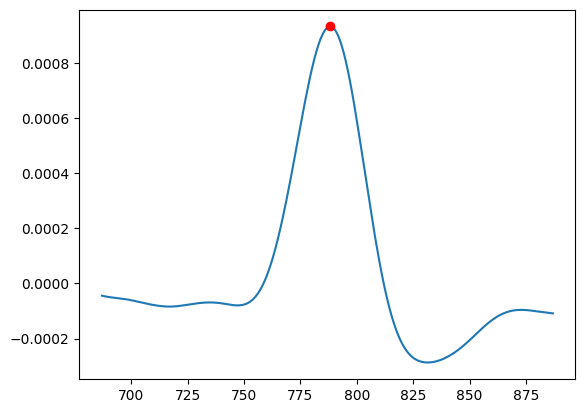

In [137]:
sample = df[:1000]
window = 100
plt.plot(
    sample
    [
        (sample[sample['ECG_R_Peaks'] == 1].index - window)[0]-1
        :
        (sample[sample['ECG_R_Peaks'] == 1].index + window)[0]
    ]['ECG_Clean']
)

plt.plot(
    sample[sample['ECG_R_Peaks'] == 1]['ECG_Clean'],
    marker='o',
    color='r'
)

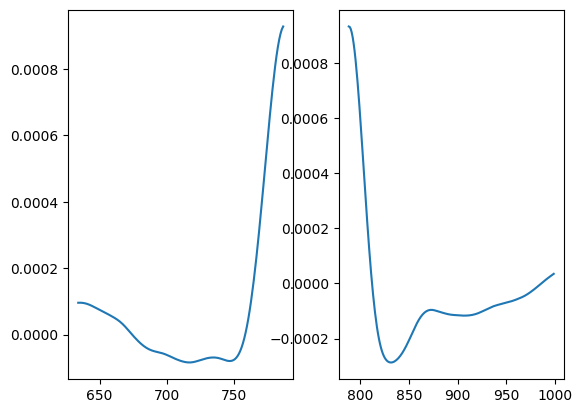

In [77]:
fig, axes = plt.subplots(1,2)
axes[0].plot(df[:1000][df['ECG_Phase_Atrial'] == 1]['ECG_Clean'])
axes[1].plot(df[:1000][df['ECG_Phase_Ventricular'] == 1]['ECG_Clean'])

In [159]:
df['r_cumsum'] = df['ECG_R_Peaks'].eq(1).cumsum()

In [160]:
df['r_cumsum'].value_counts()

r_cumsum
9274    18045
9226    11904
9279    11162
9042    10669
9142    10249
        ...  
9080      387
9115      380
9086      372
9011      347
9382      162
Name: count, Length: 9383, dtype: int64

In [194]:
df['r_cumsum'].min(), df['r_cumsum'].max()

(0, 9382)

In [162]:
sample

,timestamp,signal,signal_normalised,subject_id,category,code,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,...,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,r_cumsum
8691838,2017-12-15 12:40:57.838000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,0.000057,8.127879,0.0,...,0,0,0,0,0,0.0,1.0,1.0,0.0,9382
8691839,2017-12-15 12:40:57.839000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,0.000057,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
8691840,2017-12-15 12:40:57.840000+00:00,1.242084e-04,0.511020,30100,Recov6,48.0,1.242084e-04,0.000056,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
8691841,2017-12-15 12:40:57.841000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,0.000056,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
8691842,2017-12-15 12:40:57.842000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,0.000055,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691995,2017-12-15 12:40:57.995000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000010,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
8691996,2017-12-15 12:40:57.996000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000010,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
8691997,2017-12-15 12:40:57.997000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000009,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382
8691998,2017-12-15 12:40:57.998000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000009,8.127879,0.0,...,0,0,0,0,0,NaN,0.0,NaN,0.0,9382


In [189]:
window

,timestamp,signal,signal_normalised,subject_id,category,code,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,...,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,r_cumsum
8683962,2017-12-15 12:40:49.962000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,1.875952e-07,32.768979,0.997181,...,0,0,0,0,0,0.0,0.000000,1.0,0.000000,9380
8683963,2017-12-15 12:40:49.963000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,1.860708e-07,32.786902,0.997183,...,0,0,0,0,0,0.0,0.003096,1.0,0.009174,9380
8683964,2017-12-15 12:40:49.964000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,1.814945e-07,32.805289,0.997185,...,0,0,0,0,0,0.0,0.006192,1.0,0.018349,9380
8683965,2017-12-15 12:40:49.965000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,1.753922e-07,32.824139,0.997186,...,0,0,0,0,0,0.0,0.009288,1.0,0.027523,9380
8683966,2017-12-15 12:40:49.966000+00:00,1.248188e-04,0.511075,30100,Recov6,48.0,1.248188e-04,1.692899e-07,32.843453,0.997188,...,0,0,0,0,0,0.0,0.012384,1.0,0.036697,9380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691995,2017-12-15 12:40:57.995000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-1.006616e-05,8.127879,0.000000,...,0,0,0,0,0,NaN,0.000000,NaN,0.000000,9382
8691996,2017-12-15 12:40:57.996000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-9.623051e-06,8.127879,0.000000,...,0,0,0,0,0,NaN,0.000000,NaN,0.000000,9382
8691997,2017-12-15 12:40:57.997000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-9.179649e-06,8.127879,0.000000,...,0,0,0,0,0,NaN,0.000000,NaN,0.000000,9382
8691998,2017-12-15 12:40:57.998000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-8.736045e-06,8.127879,0.000000,...,0,0,0,0,0,NaN,0.000000,NaN,0.000000,9382


In [235]:
window['ECG_R_Peaks'].value_counts()

ECG_R_Peaks
0    5762
1       3
Name: count, dtype: int64

In [229]:
def plot(target, range=1):
    window = df[df['r_cumsum'].between(target - range, target + range)]

    sample = window[window['r_cumsum'] == target]
    rest = window[window['r_cumsum'] != target]

    plt.rcParams["figure.dpi"] = 200
    fig, ax = plt.subplots(figsize=(30, 10), dpi=300)

    ax.plot(
        rest['ECG_Clean']
    )

    ax.plot(
        sample['ECG_Clean'],
        color='r'
    )

    ax.axhline(y=0, color='black', linestyle='--')

    for index, peak in window[window['ECG_R_Peaks'] == 1].iterrows():
        ax.scatter(index, peak['ECG_Clean'], color='g')

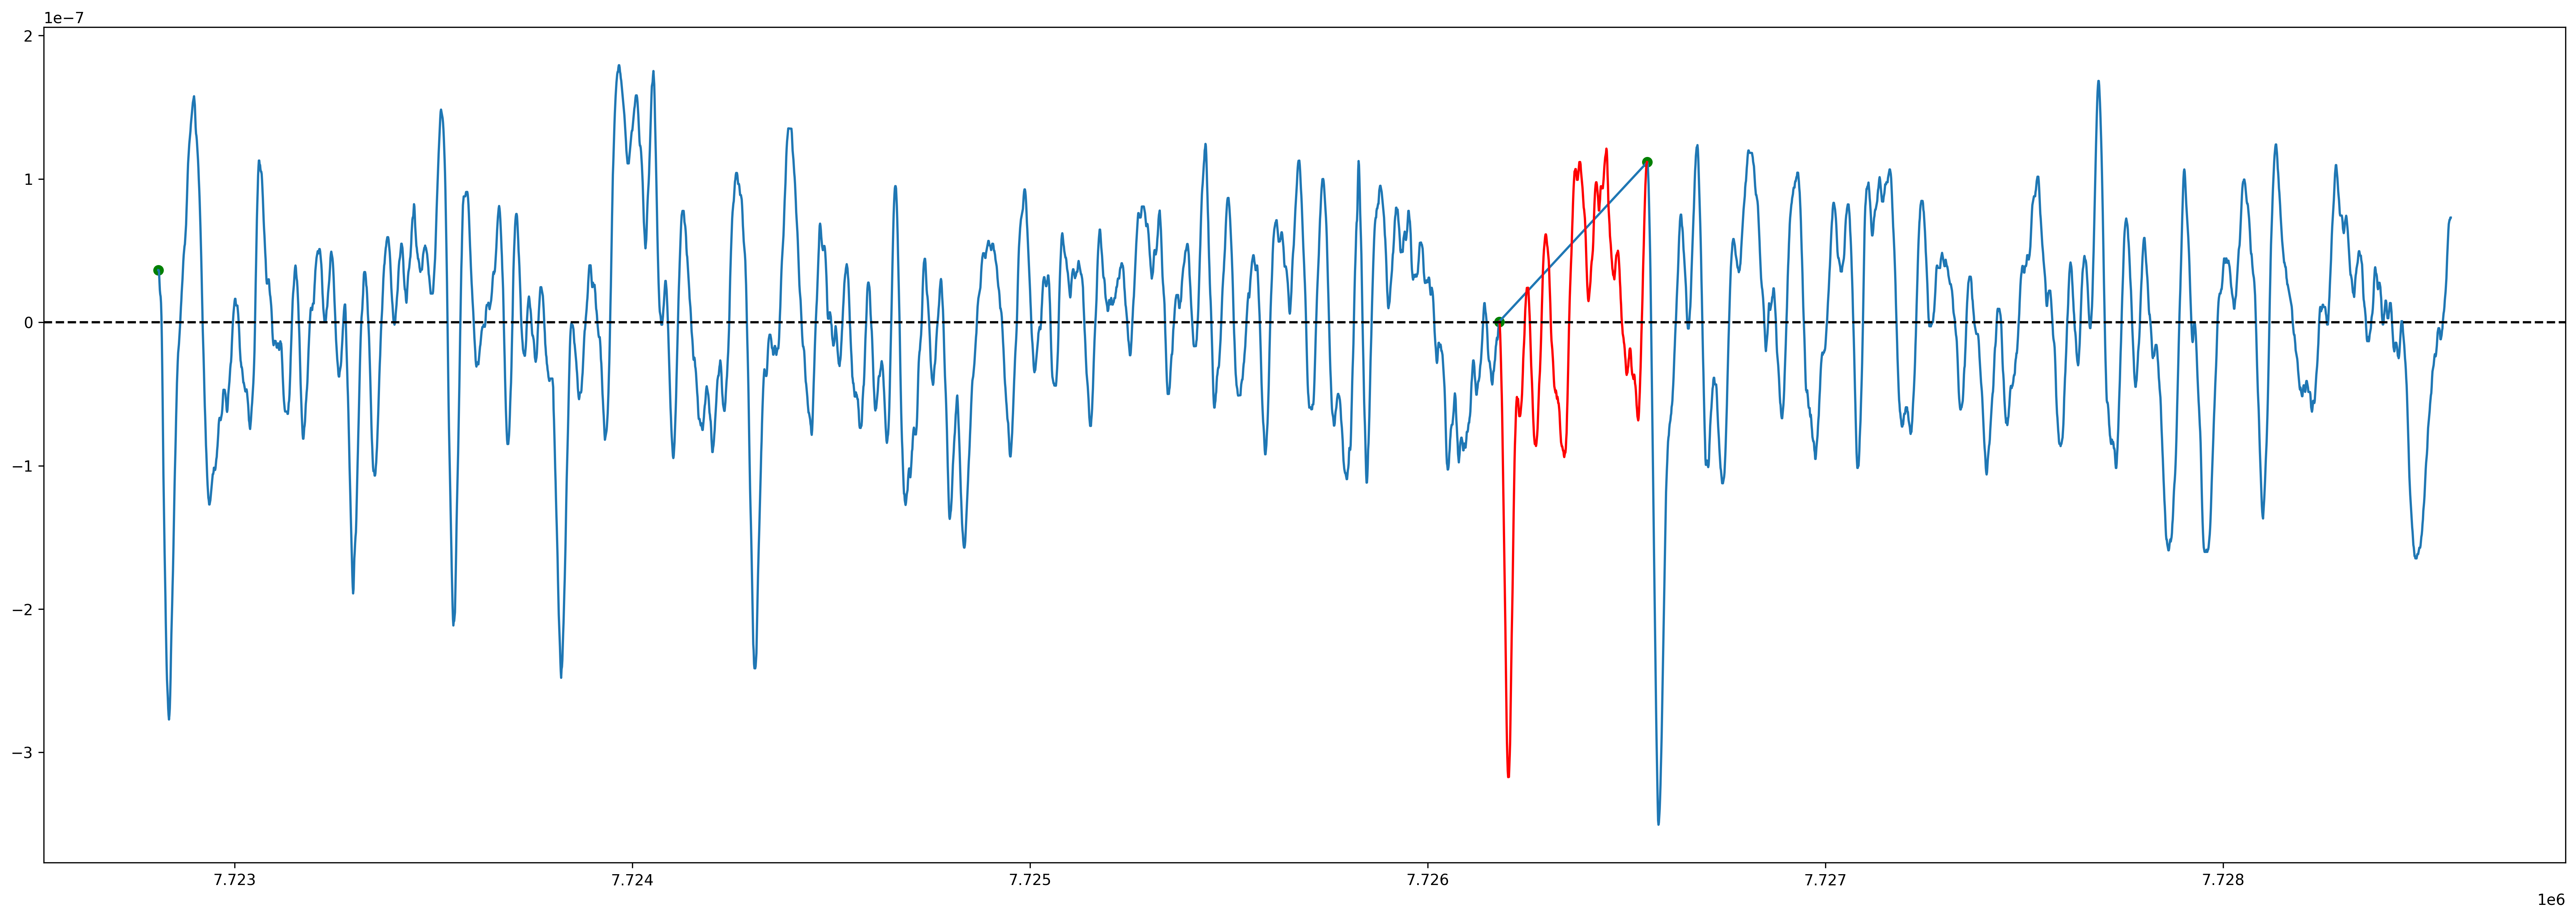

In [230]:
plot(9086, 1)

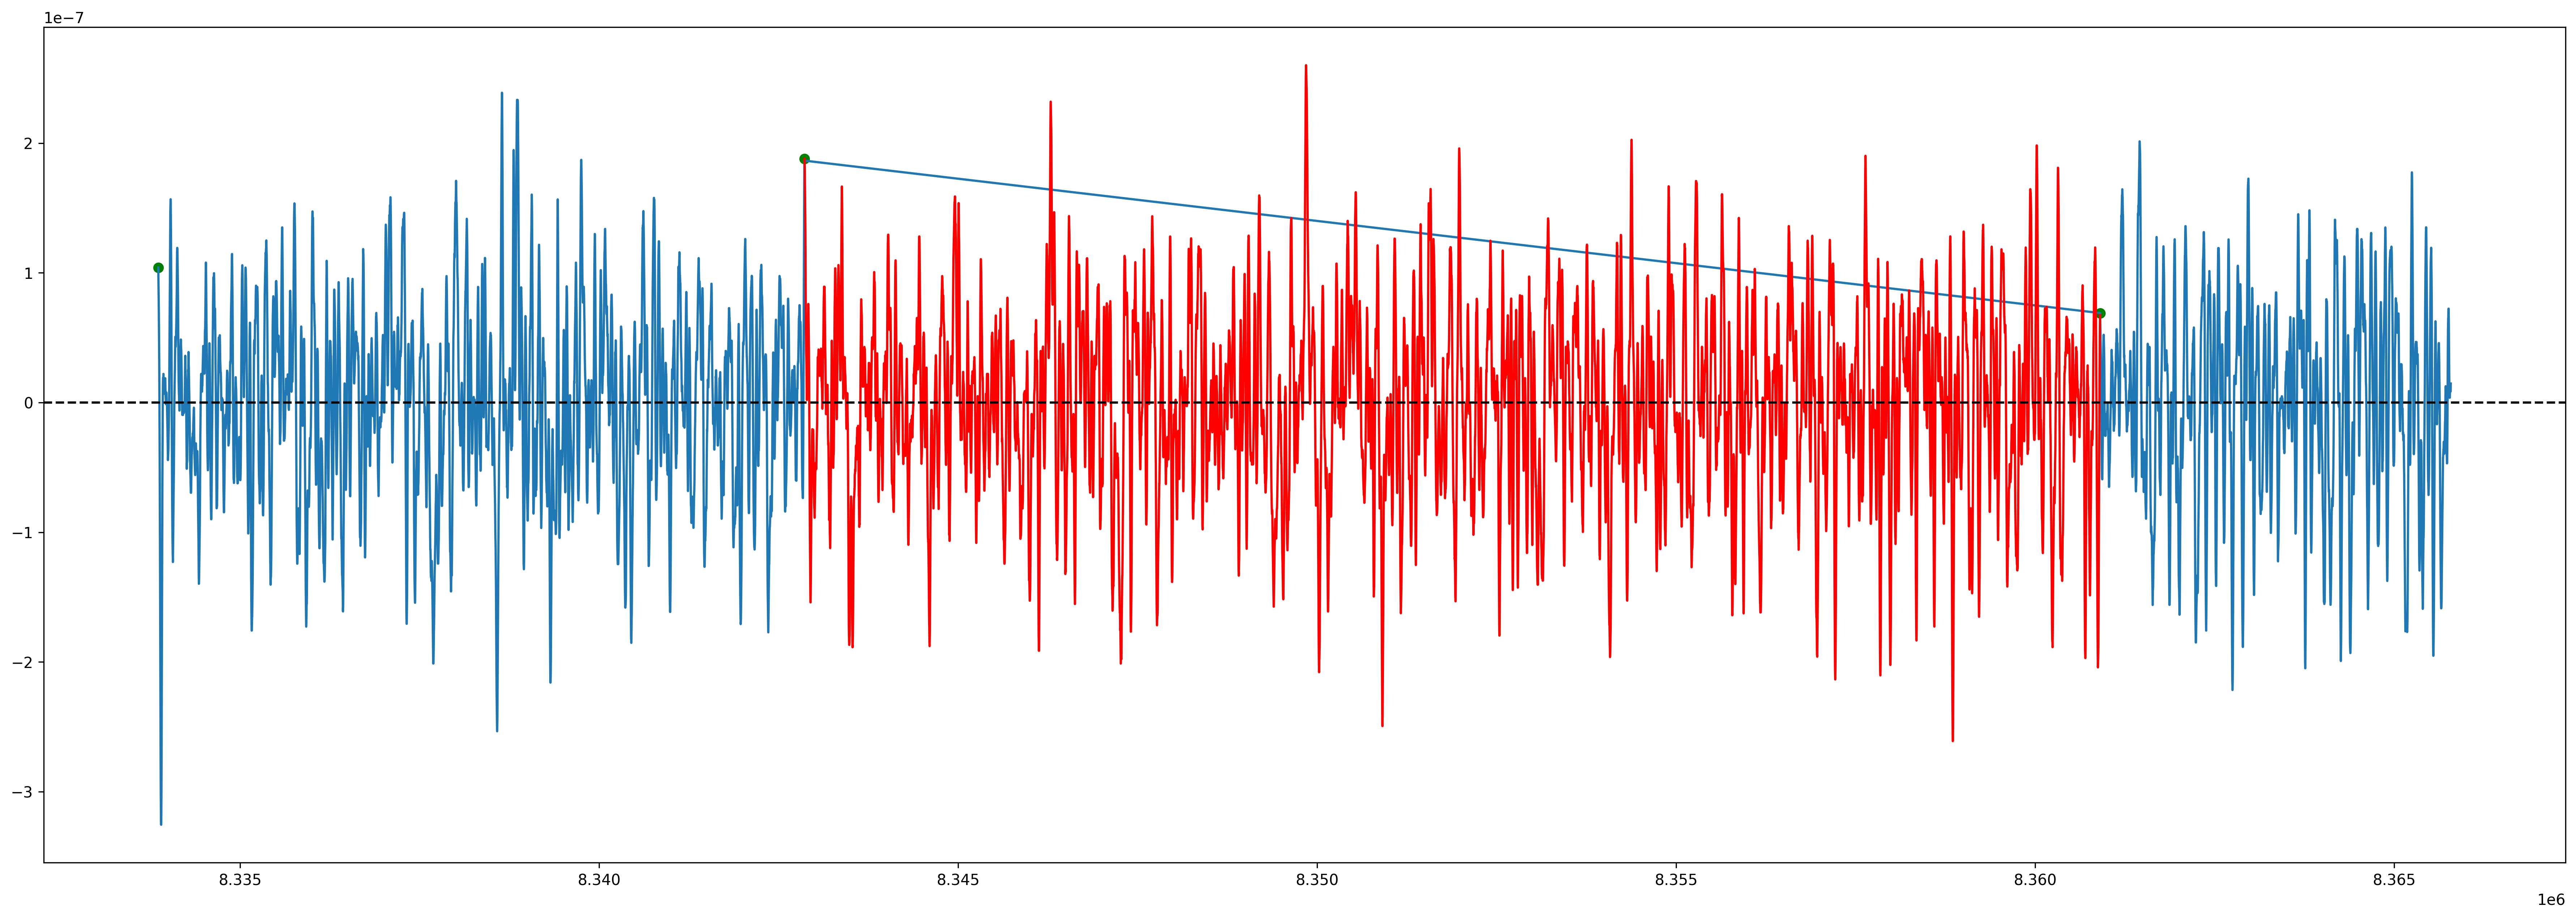

In [231]:
plot(9274, 1)

## Task 2: Frequency Domain